# Time Series Plots

In [1]:
#import paskages
import numpy as np
import matplotlib.pyplot as plt

#### Plot Utilities

In [2]:
def plot_series(time , series , format='-' , start=0 , end=None , label=None):

    
    """
    Visualizes time series data

    Args:
      time (array of int) - contains the time steps
      series (array of int) - contains the measurements for each time step
      format (string) - line style when plotting the graph
      start (int) - first time step to plot
      end (int) - last time step to plot
      label (list of strings)- tag for the line
    """
    
    plt.figure(figsize=(10,6))
    
    plt.plot(time[start:end] ,   series[start:end] , format)
    
    plt.xlabel("Time")
    plt.ylabel("Value")
    
    if label:
        plt.legend(labels= label , fontsize=14)
    
    plt.grid(True)
    
    plt.show()

#### Trend

Generates synthetic data that follows a straight line given a slope value.

In [3]:
def trend(time , slope=0):
    """
    Generates synthetic data that follows a straight line given a slope value.

    Args:
      time (array of int) - contains the time steps
      slope (float) - determines the direction and steepness of the line

    Returns:
      series (array of float) - measurements that follow a straight line
    """
    
    #compute linear series given slope
    series = slope* time
    
    return series


In [4]:
trend(np.array([10,11,12,13,14]),[0.25])

array([2.5 , 2.75, 3.  , 3.25, 3.5 ])

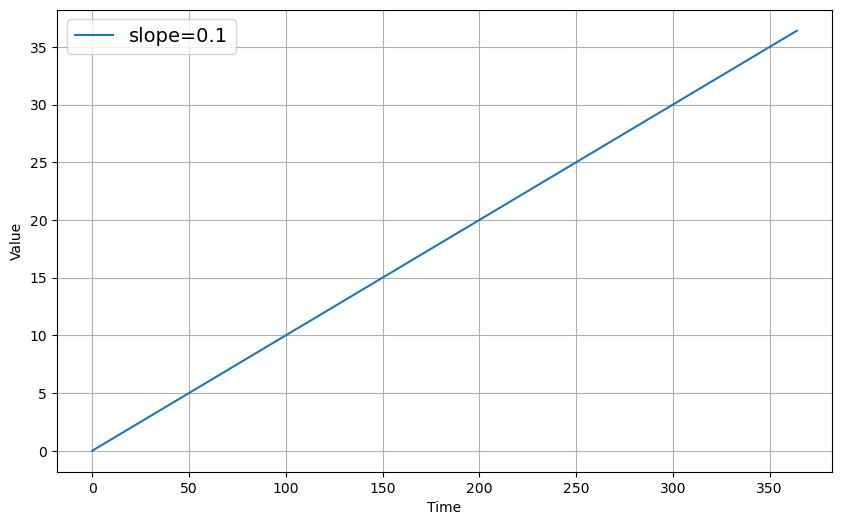

In [5]:
# Generate time steps
time = np.arange(365)
slope=0.1

series = trend(time , slope)

plot_series(time , series , label=[f'slope={slope}'])

#### Seasonality

 This refers to a recurring pattern at regular time intervals

In [9]:
def seasonal_pattern(seasson_time):
    data_pattern = np.where(seasson_time<0.4 , 
                           np.cos(seasson_time*2* np.pi),
                           
                           1/np.exp(3*seasson_time)
                           )
    return data_pattern

In [10]:
seasonal_pattern(np.array([6,7,7,7]))

array([1.52299797e-08, 7.58256043e-10, 7.58256043e-10, 7.58256043e-10])

In [32]:
def seasonality(time , period , amplitude= 1 , phase=0):
    season_time =((time+phase) % period ) / period
    
    data_pattern = amplitude* seasonal_pattern(season_time)
    return data_pattern

The cell below shows the seasonality of the data generated because you can see the pattern every 365 time steps.

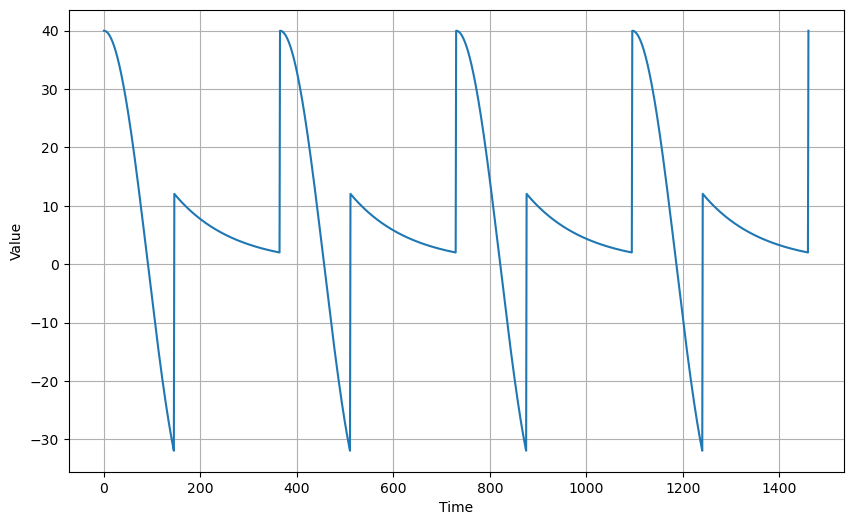

In [46]:
# Generate time steps
time = np.arange(4*365+1)
period= 365
amplitude=40
series =seasonality(time , period , amplitude)
plot_series(time , series)

A time series can also contain both trend and seasonality. For example, the hourly temperature might oscillate regularly in short time frames, but it might show an upward trend if you look at multi-year data.

The example below demonstrates a seasonal pattern with an upward trend:

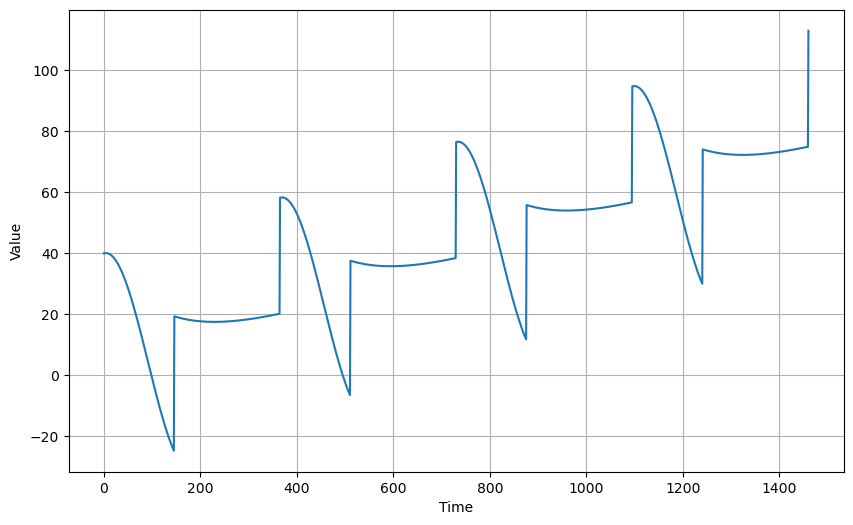

In [62]:
# Define seasonal parameters
slope = 0.05
period = 365
amplitude = 40

series= trend(time,slope)+seasonality(time , period , amplitude)

plot_series(time ,series)

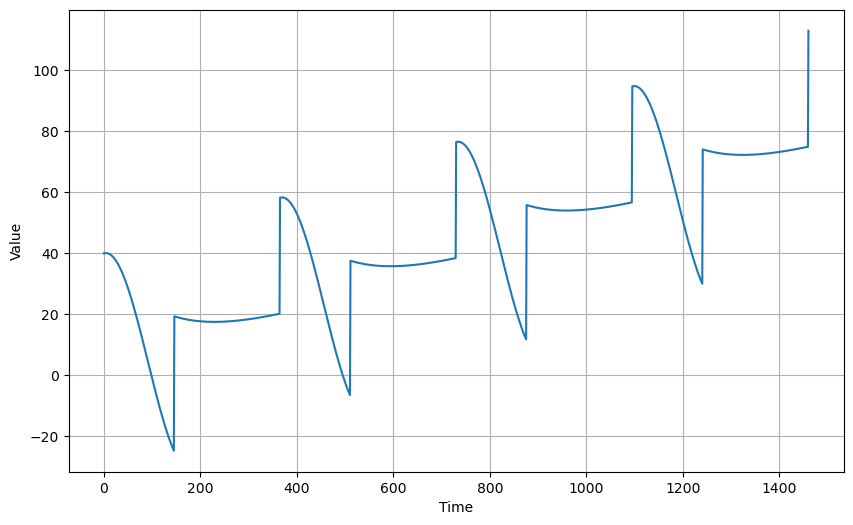

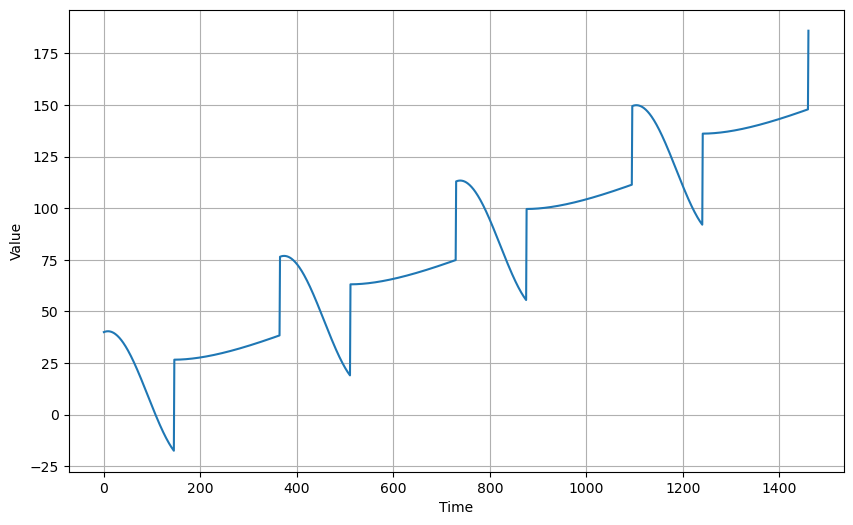

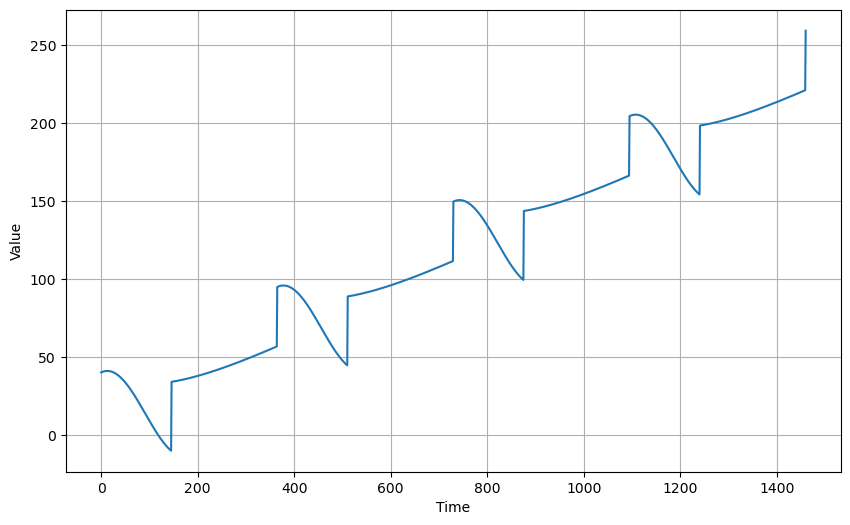

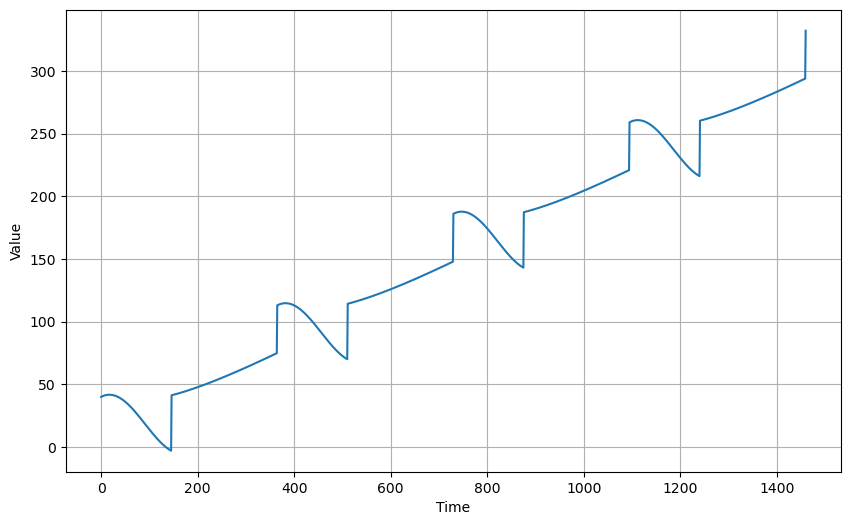

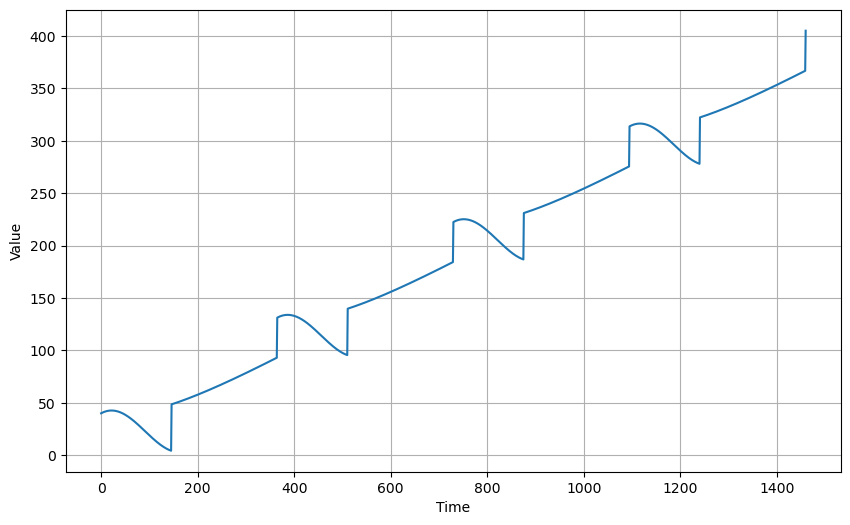

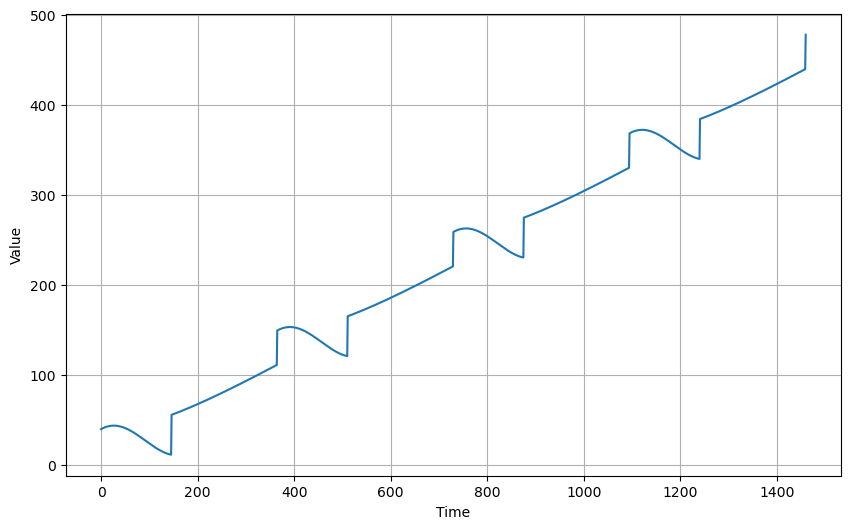

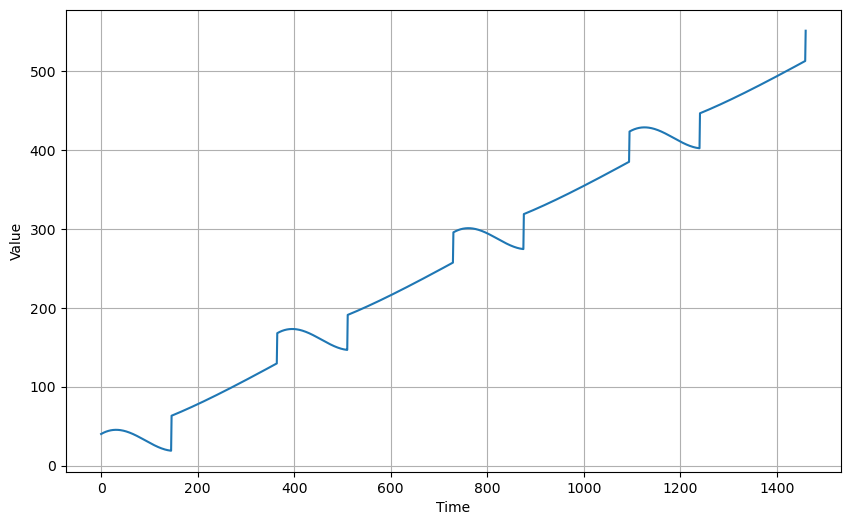

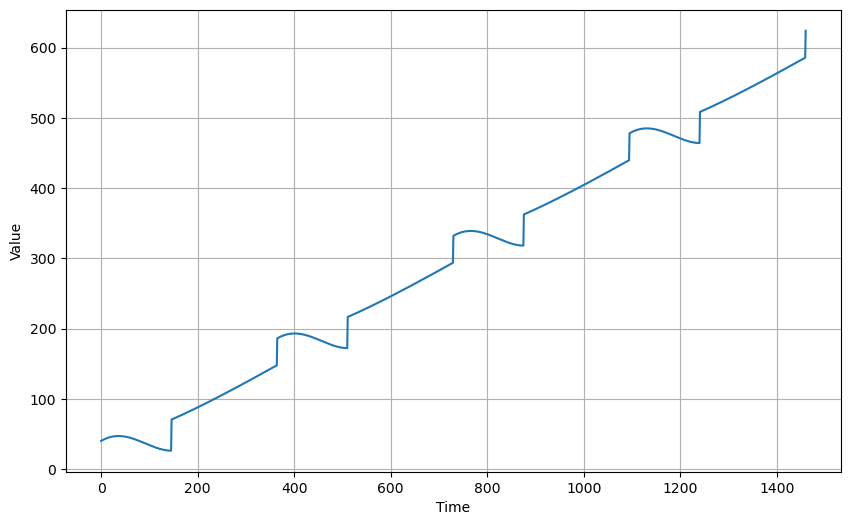

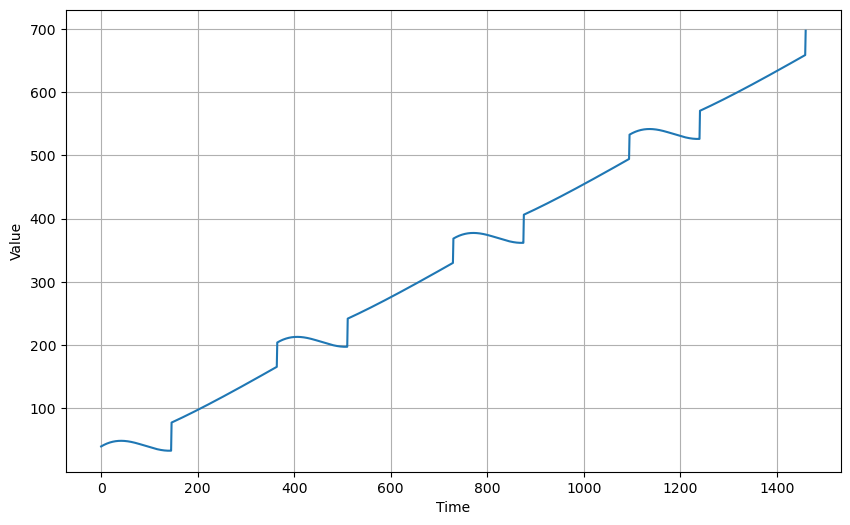

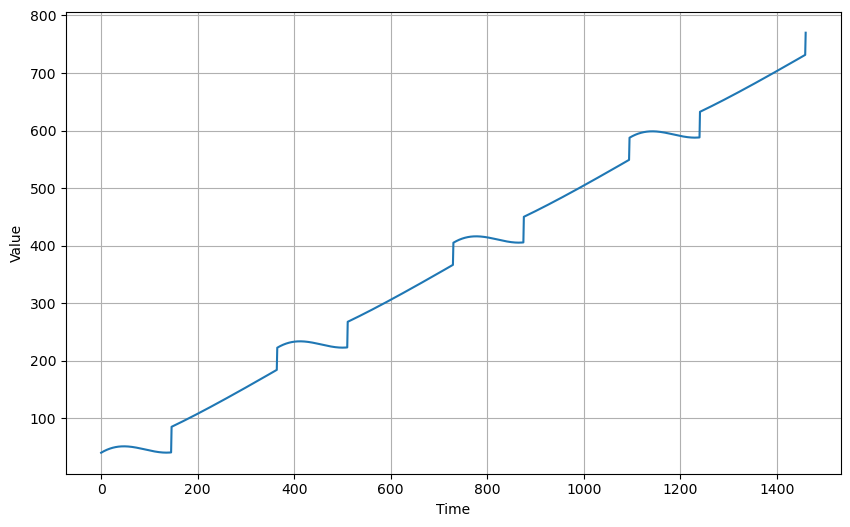

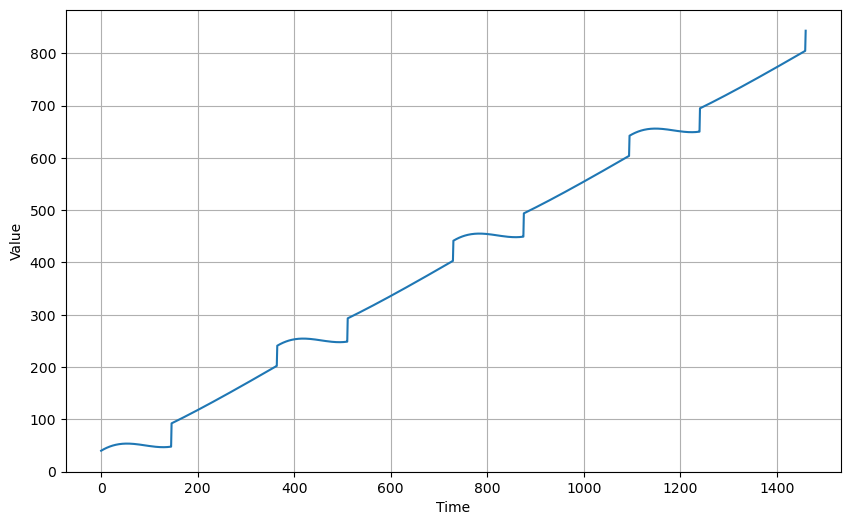

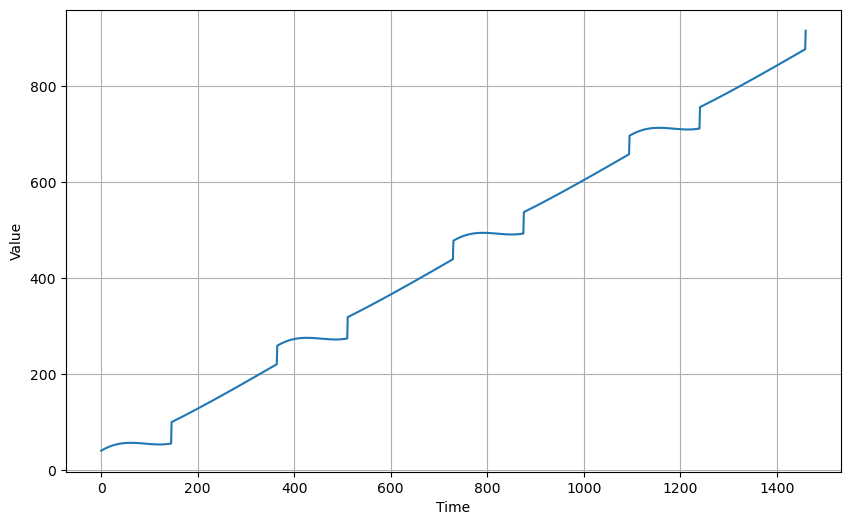

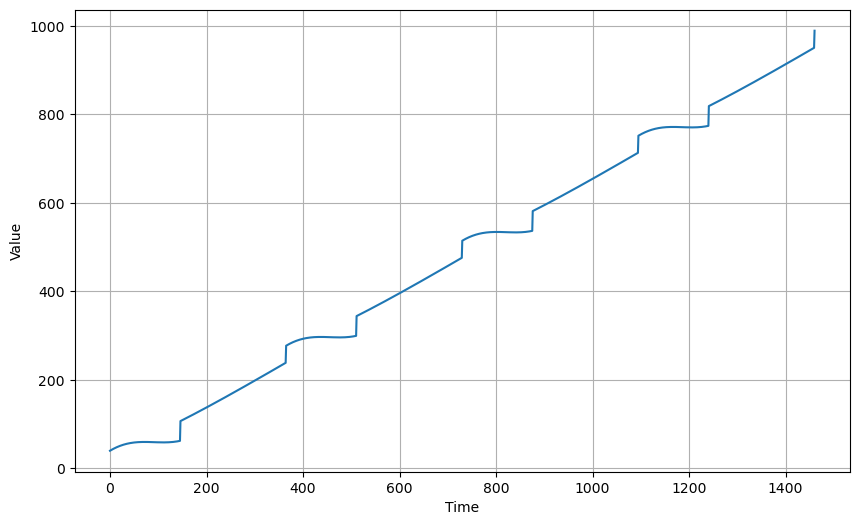

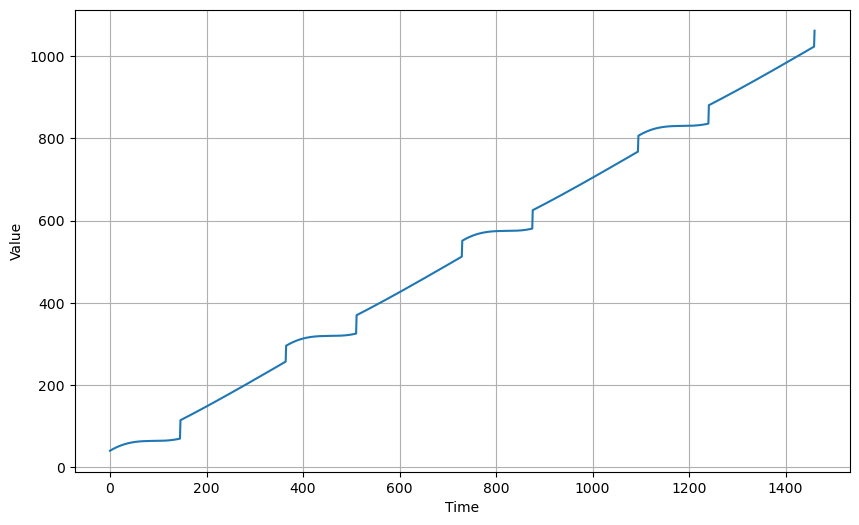

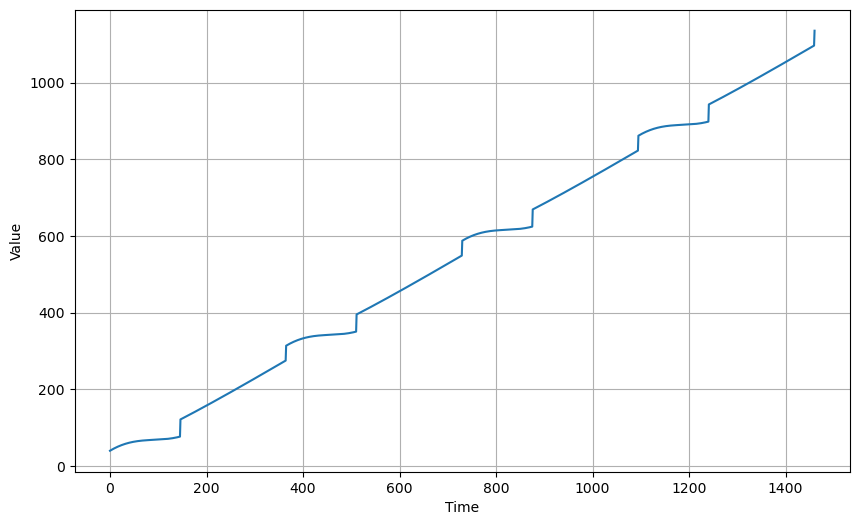

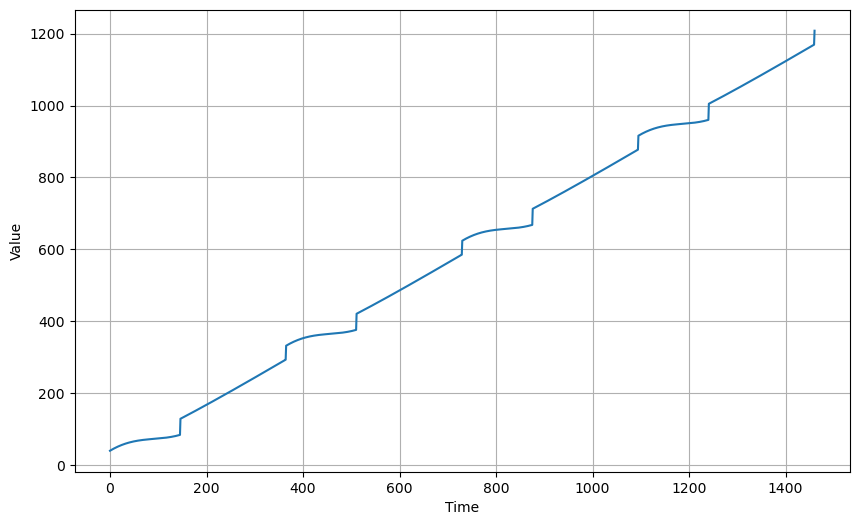

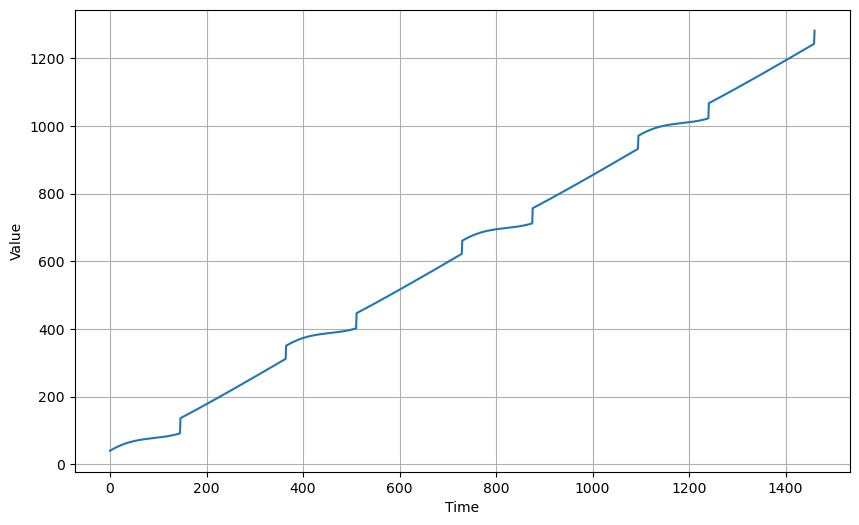

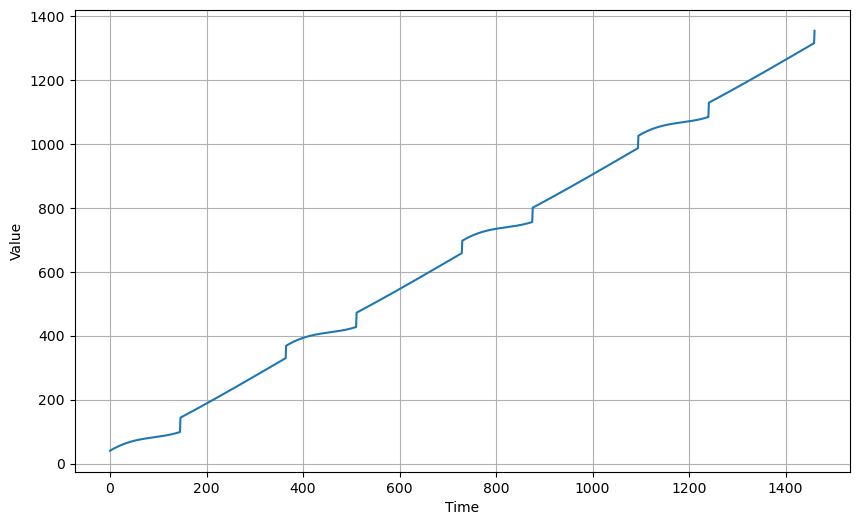

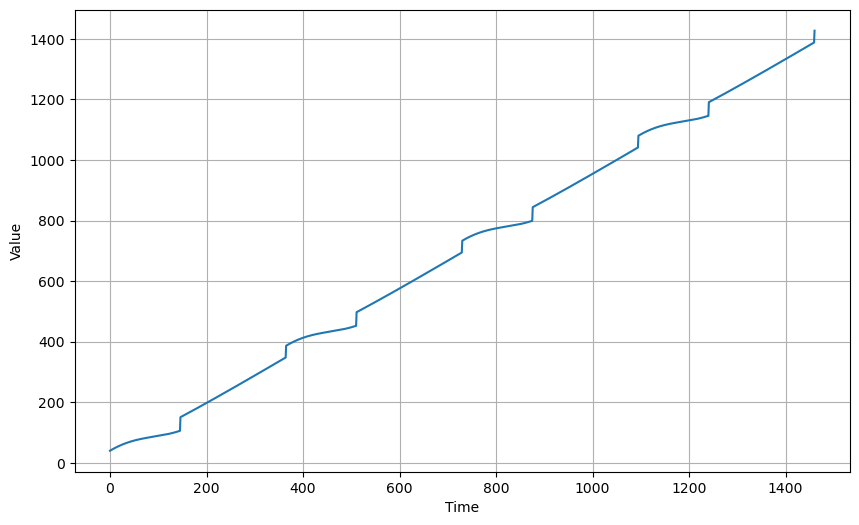

In [75]:
for i in range(1,100):
    if i%5==0:
        slope = i/100
        period = 365
        amplitude = 40

        series= trend(time,slope)+seasonality(time , period , amplitude)

        plot_series(time ,series)

### Noise

In [93]:
def noise(time , noise_level=1 ,seed = None):
    #Generates a normally distributed noisy signal
    rnd = np.random.RandomState(seed)
    noise = rnd.randn(len(time))*noise_level
    
    return noise

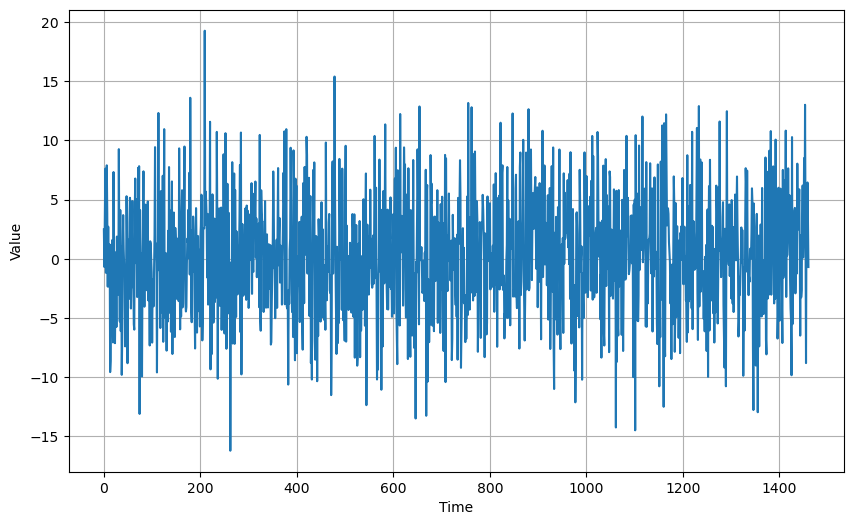

In [103]:
noise_level=5
noise_signal= noise(time ,noise_level ,seed = 42)
plot_series(time ,noise_signal)

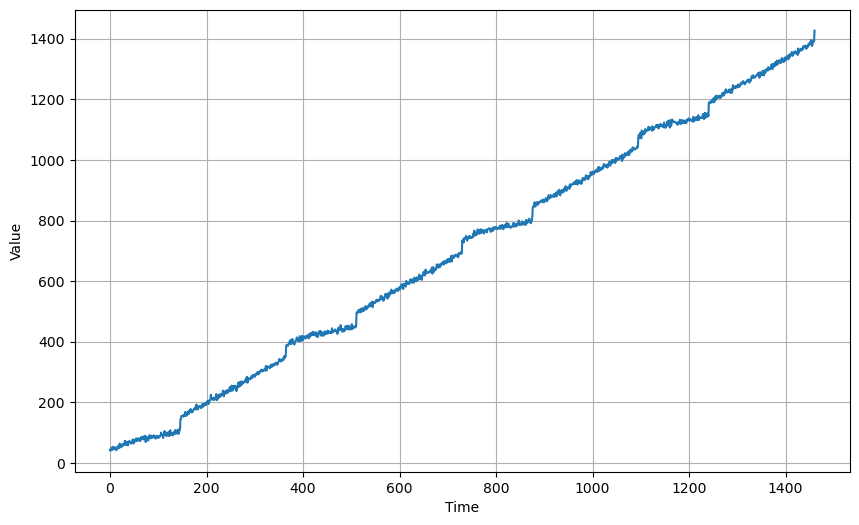

In [104]:
series += noise_signal
plot_series(time ,series)

### Autocorrelation


In [107]:
def autocorrelation(time , amplitude ,seed =None):
    rnd= np.random.RandomState(seed)
    ar=rnd.randn(len(time)+50)
    
    ar[:50]=100
    phi1 =0.5
    phi2= -0.1
    
    for step in range(50, len(time) + 50):
        ar[step] += phi1 * ar[step - 50]
        ar[step] += phi2 * ar[step - 33]
    
    ar = ar[50:] * amplitude
    
    return ar

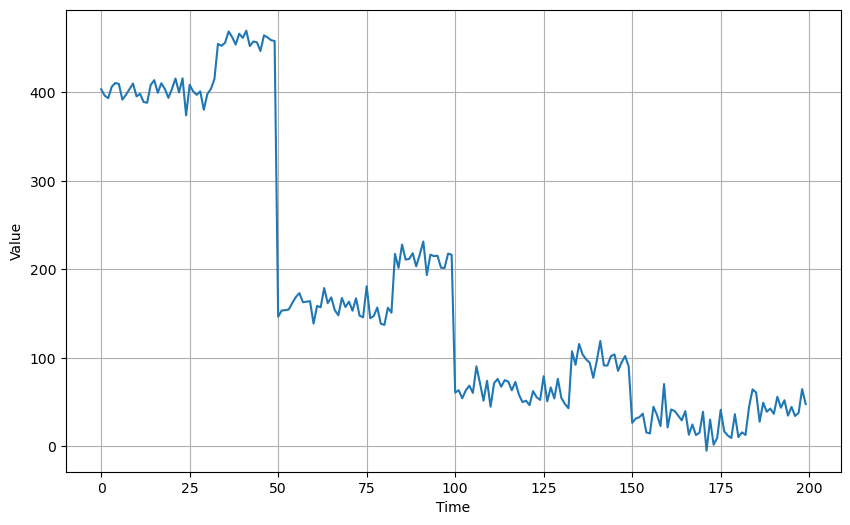

In [108]:
series = autocorrelation(time, amplitude=10, seed=42)
plot_series(time[:200], series[:200])

In [109]:
def autocorrelation(time, amplitude, seed=None):
    """
    Generates autocorrelated data

    Args:
      time (array of int) - contains the time steps
      amplitude (float) - scaling factor
      seed (int) - number generator seed for repeatability

    Returns:
      ar (array of float) - generated autocorrelated data
    """

    # Initialize random number generator 
    rnd = np.random.RandomState(seed)

    # Initialize array of random numbers equal to the length 
    # of the given time steps plus an additional step
    ar = rnd.randn(len(time) + 1)

    # Define scaling factor
    phi = 0.8

    # Autocorrelate element 11 onwards with the measurement at 
    # (t-1), where t is the current time step
    for step in range(1, len(time) + 1):
        ar[step] += phi * ar[step - 1]
    
    # Get the autocorrelated data and scale with the given amplitude.
    ar = ar[1:] * amplitude
    
    return ar

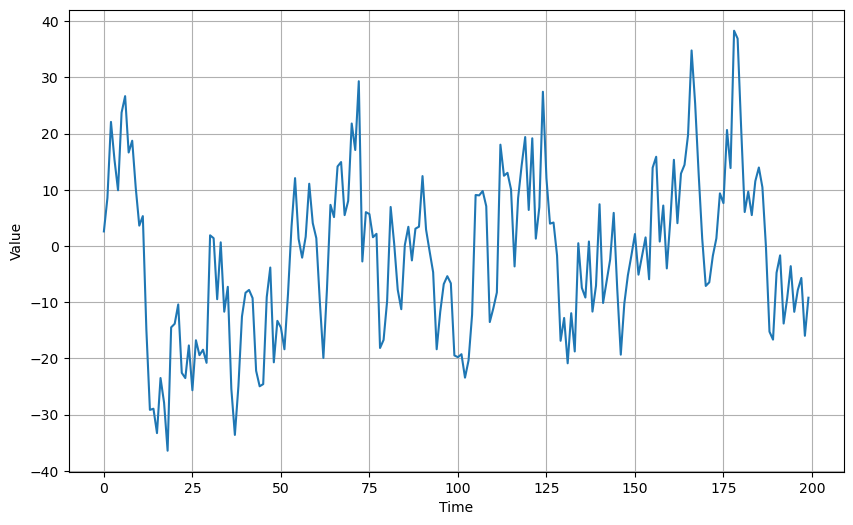

In [110]:
series = autocorrelation(time, amplitude=10, seed=42)

# Plot the results
plot_series(time[:200], series[:200])

Another autocorrelated time series you might encounter is one where it decays predictably after random spikes. You will first define the function that generates these spikes below.

In [111]:
def impulses(time, num_impulses, amplitude=1, seed=None):
    """
    Generates random impulses

    Args:
      time (array of int) - contains the time steps
      num_impulses (int) - number of impulses to generate
      amplitude (float) - scaling factor
      seed (int) - number generator seed for repeatability

    Returns:
      series (array of float) - array containing the impulses
    """

    # Initialize random number generator 
    rnd = np.random.RandomState(seed)

    # Generate random numbers
    impulse_indices = rnd.randint(len(time), size=num_impulses)

    # Initialize series
    series = np.zeros(len(time))

    # Insert random impulses
    for index in impulse_indices:
        series[index] += rnd.rand() * amplitude

    return series    

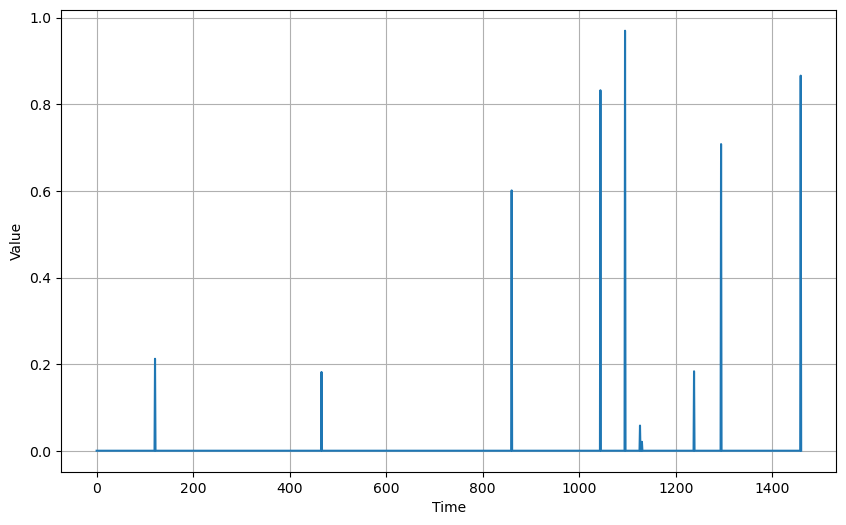

In [112]:
# Generate random impulses
impulses_signal = impulses(time, num_impulses=10, seed=42)

# Plot the results
plot_series(time, impulses_signal)

In [113]:
def autocorrelation_impulses(source, phis):
    """
    Generates autocorrelated data from impulses

    Args:
      source (array of float) - contains the time steps with impulses
      phis (dict) - dictionary containing the lag time and decay rates

    Returns:
      ar (array of float) - generated autocorrelated data
    """

    # Copy the source
    ar = source.copy()

    # Compute new series values based on the lag times and decay rates
    for step, value in enumerate(source):
        for lag, phi in phis.items():
            if step - lag > 0:
              ar[step] += phi * ar[step - lag]

    return ar

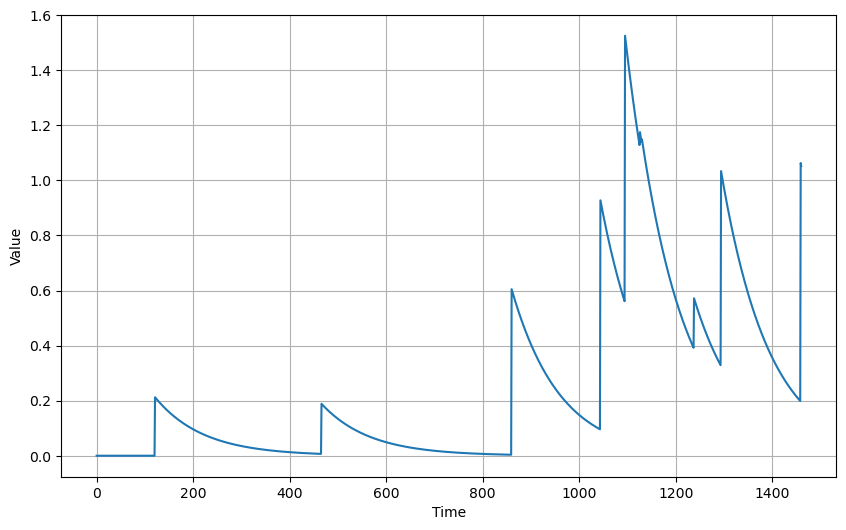

In [114]:
series = autocorrelation_impulses(impulses_signal, {1: 0.99})

# Plot the results
plot_series(time, series)

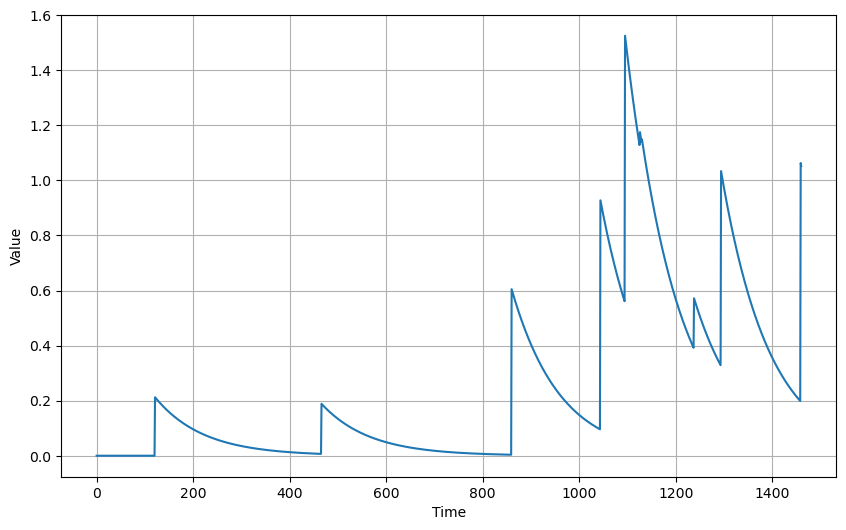

In [115]:
series = autocorrelation_impulses(impulses_signal, {1: 0.99})

# Plot the results
plot_series(time, series)

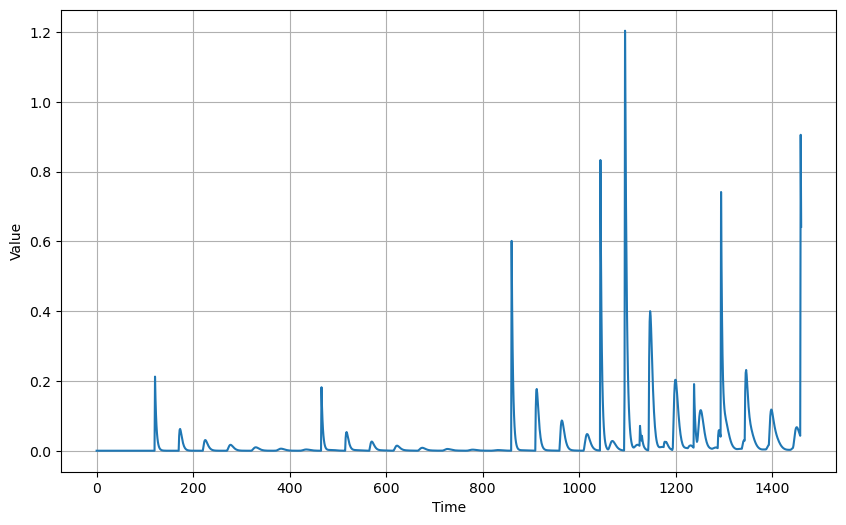

In [116]:
series = autocorrelation_impulses(impulses_signal, {1: 0.70, 50: 0.2})

# Plot the results
plot_series(time, series)

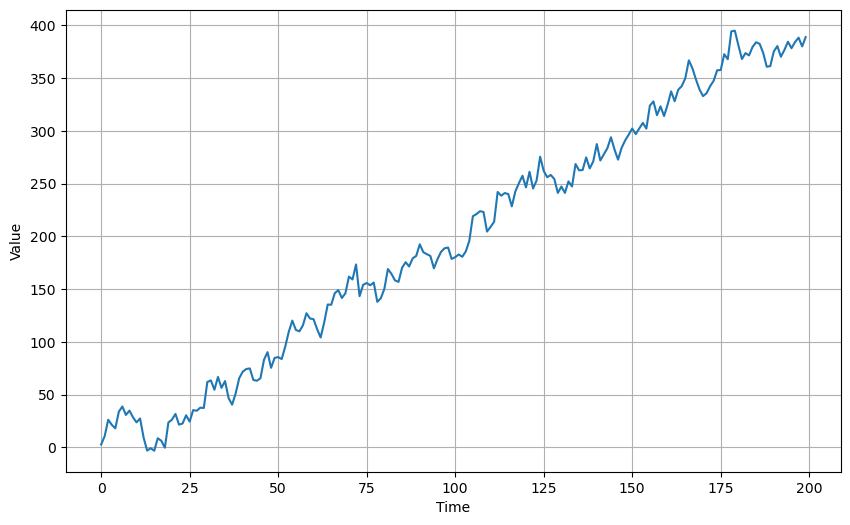

In [117]:
series = autocorrelation(time, 10, seed=42) + trend(time, 2)

# Plot the results
plot_series(time[:200], series[:200])

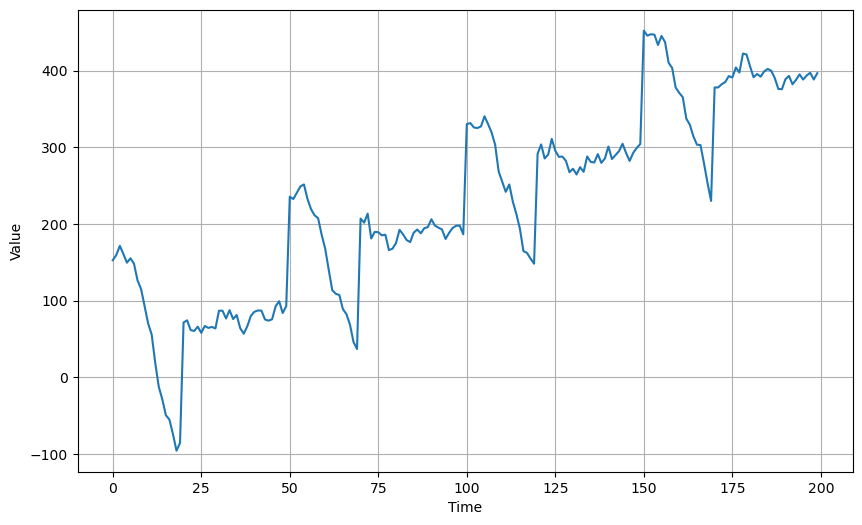

In [118]:
series = autocorrelation(time, 10, seed=42) + seasonality(time, period=50, amplitude=150) + trend(time, 2)

# Plot the results
plot_series(time[:200], series[:200])

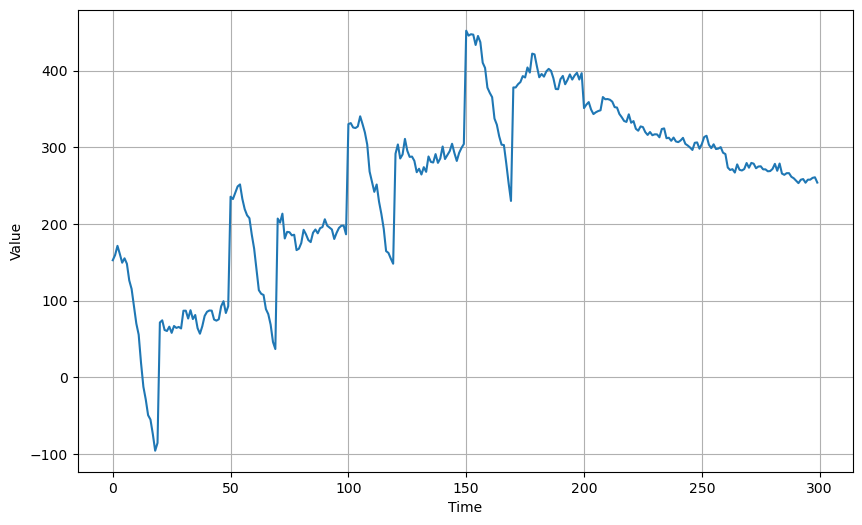

In [119]:
series = autocorrelation(time, 10, seed=42) + seasonality(time, period=50, amplitude=150) + trend(time, 2)

# Generate data with negative trend
series2 = autocorrelation(time, 5, seed=42) + seasonality(time, period=50, amplitude=2) + trend(time, -1) + 550

# Splice the downward trending data into the first one at time step = 200
series[200:] = series2[200:]

# Plot the result
plot_series(time[:300], series[:300])